In [1]:
import os
import matplotlib.pyplot as plt

from model import (
    SocietyConstantsEnergyPrices,
    GovernmentBuildChargingStation,
    GovernmentMixedStrategy,
    CV,
    EV,
    PHEV,
)
from model.utils import (
    get_trajectories,
    common_params,
    plot_intervals,
    check_by,
    plot_check_by,
)

In [2]:
# plt.style.use("dark_background")
# plt.rc("grid", alpha=0.3)

In [3]:
# MC = 100
# T = 90

MC = 100
T = 12 * 20

N = common_params["kwargs"]["population"]

# param = "alpha"
# param_list = [0.01, 0.05]#, 0.1, 0.2, 0.4, 0.6]
# param = "nerby_radius"
# param_list = [1,3,5,7,10]
param = "corporation_technological_progress"
param_list = [0.001, 0.005, 0.01, 0.1]

param = "energy_factor"
param_list = [0.2, 0.5, 0.7, 0.9, 1]


param = "energy_price"
param_list = [500, 600, 700]

In [4]:
common_params["kwargs"]["government"] = GovernmentMixedStrategy()
common_params["kwargs"]

{'alpha': 0.01,
 'car_price_noise': <function model.utils.common_params.<lambda>()>,
 'city_size': (54, 54),
 'corporation_margin': 0.2,
 'corporation_technological_progress': 0.004,
 'energy_price': 600,
 'energy_factor': 1,
 'fuel_price': 6,
 'government': <model.Government.GovernmentMixedStrategy at 0x7fdfabcd9f90>,
 'initial_public_chargers': 6,
 'initial_time': (2015, 1),
 'nerby_radius': 1,
 'population': 3000}

In [5]:
values = check_by(
    SocietyConstantsEnergyPrices, common_params["kwargs"], param, param_list, T, MC, 4
)

100%|██████████| 3/3 [00:59<00:00, 19.73s/it]


Text(0.5, 1.0, 'PHEV')

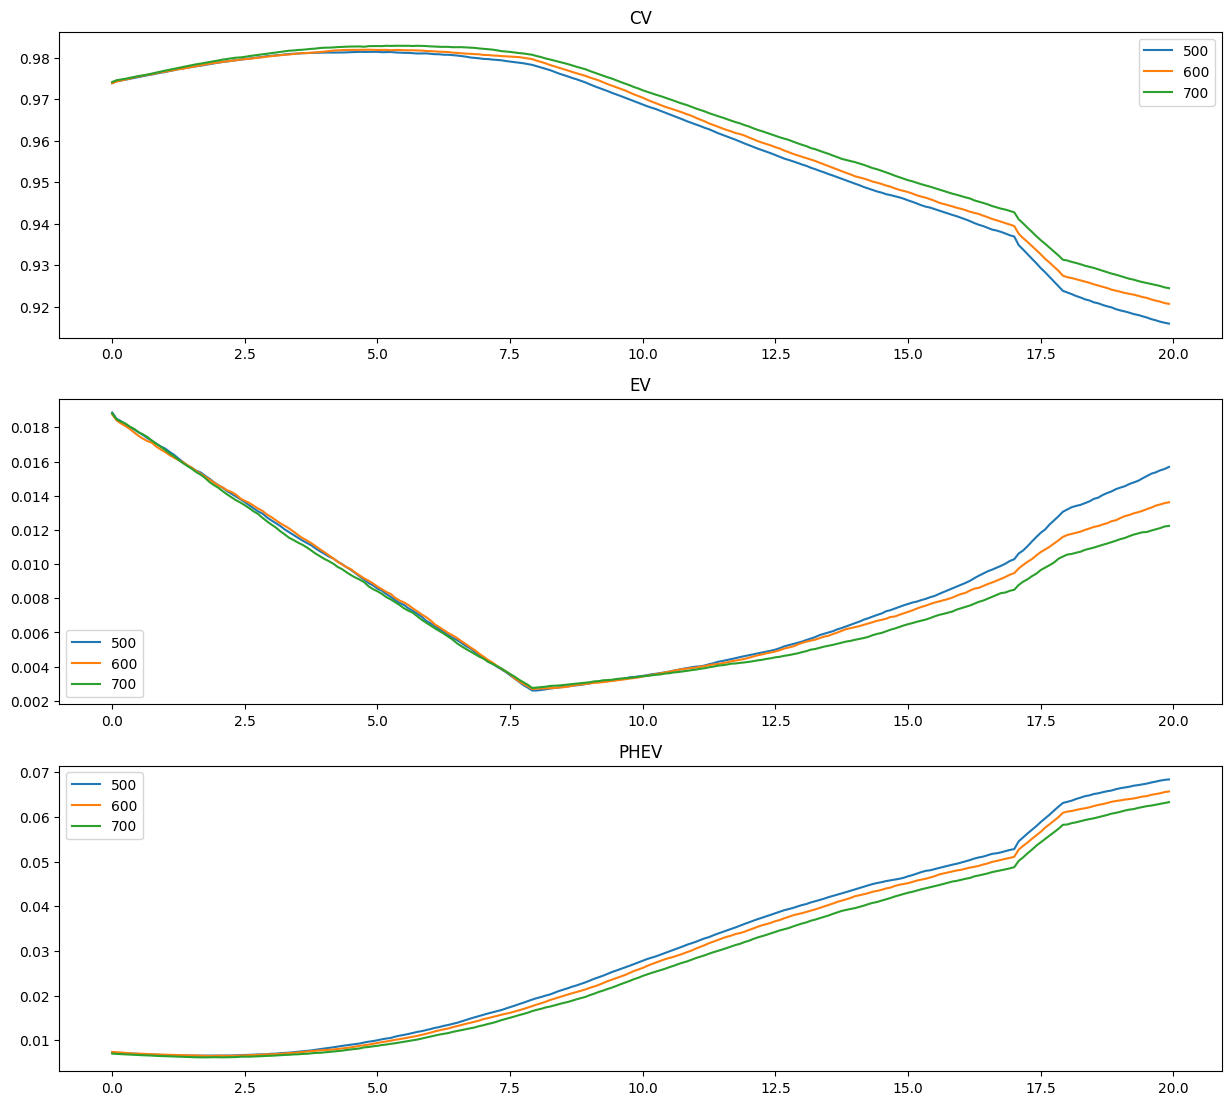

In [6]:
fig, axs = plt.subplots(nrows=3, figsize=(15, 13.5))
plot_check_by(values, axs)

for ax in axs:
    ax.legend()
axs[0].set_title(CV)
axs[1].set_title(EV)
axs[2].set_title(PHEV)

In [7]:
# fig, axs = plt.subplots(nrows=3, figsize=(10, 9))

# plot_intervals(
#     year / 12,
#     [trajectory / N for trajectory in CVs],
#     ax=axs[0],
#     color="c",
#     label="CV",
#     alpha=0.3,
# )
# plot_intervals(
#     year / 12,
#     [trajectory / N for trajectory in EVs],
#     ax=axs[1],
#     color="m",
#     label="EV",
#     alpha=0.3,
# )
# plot_intervals(
#     year / 12,
#     [trajectory / N for trajectory in PHEVs],
#     ax=axs[2],
#     color="y",
#     label="PHEV",
#     alpha=0.3,
# )


# axs[0].legend()
# axs[1].legend()
# axs[2].legend()

# axs[0].set_title("CV")
# axs[1].set_title("EV")
# axs[2].set_title("PHEV")

# fig.suptitle("constatnt prices, government build chargers stations", fontsize=16)